In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

import numpy as np

In [2]:
def display_image (path:str):
    img = Image.open(path)  
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

In [17]:
amharic_lookup = {
     0: 'ሀ',  1: 'ሁ',  2: 'ሂ',  3: 'ሃ',  4: 'ሄ',  5: 'ህ',  6: 'ሆ',
     7: 'ለ',  8: 'ሉ',  9: 'ሊ', 10: 'ላ', 11: 'ሌ', 12: 'ል', 13: 'ሎ',
    14: 'ሏ', 15: 'መ', 16: 'ሙ', 17: 'ሚ', 18: 'ማ', 19: 'ሜ', 20: 'ም',
    21: 'ሞ', 22: 'ሟ', 23: 'ሠ', 24: 'ሡ', 25: 'ሢ', 26: 'ሣ', 27: 'ሤ',
    28: 'ሥ', 29: 'ሦ', 30: 'ሧ', 31: 'ረ', 32: 'ሩ', 33: 'ሪ', 34: 'ራ',
    35: 'ሬ', 36: 'ር', 37: 'ሮ', 38: 'ሯ', 39: 'ሰ', 40: 'ሱ', 41: 'ሲ',
    42: 'ሳ', 43: 'ሴ', 44: 'ስ', 45: 'ሶ', 46: 'ሷ', 47: 'ሸ', 48: 'ሹ',
    49: 'ሺ', 50: 'ሻ', 51: 'ሼ', 52: 'ሽ', 53: 'ሾ', 54: 'ሿ', 55: 'ቀ',
    56: 'ቁ', 57: 'ቂ', 58: 'ቃ', 59: 'ቄ', 60: 'ቅ', 61: 'ቆ', 62: 'ቇ',
    63: 'ቈ', 64: 'ቊ', 65: 'ቋ', 66: 'ቌ', 67: 'ቍ', 68: 'በ', 69: 'ቡ',
    70: 'ቢ', 71: 'ባ', 72: 'ቤ', 73: 'ብ', 74: 'ቦ', 75: 'ቧ', 76: 'ቨ',
    77: 'ቩ', 78: 'ቪ', 79: 'ቫ', 80: 'ቬ', 81: 'ቭ', 82: 'ቮ', 83: 'ቯ',
    84: 'ተ', 85: 'ቱ', 86: 'ቲ', 87: 'ታ', 88: 'ቴ', 89: 'ት', 90: 'ቶ',
    91: 'ቷ', 92: 'ቸ', 93: 'ቹ', 94: 'ቺ', 95: 'ቻ', 96: 'ቼ', 97: 'ች',
    98: 'ቾ', 99: 'ቿ', 100: 'ኀ', 101: 'ኁ', 102: 'ኂ', 103: 'ኃ', 104: 'ኄ',
    105: 'ኅ', 106: 'ኆ', 107: 'ኇ', 108: 'ኈ', 109: 'ኊ', 110: 'ኋ', 111: 'ኌ',
    112: 'ኍ', 113: '኎', 114: '኏', 115: 'ነ', 116: 'ኑ', 117: 'ኒ', 118: 'ና',
    119: 'ኔ', 120: 'ን', 121: 'ኖ', 122: 'ኗ', 123: 'ኘ', 124: 'ኙ', 125: 'ኚ',
    126: 'ኛ', 127: 'ኜ', 128: 'ኝ', 129: 'ኞ', 130: 'ኟ', 131: 'አ', 132: 'ኡ',
    133: 'ኢ', 134: 'ኣ', 135: 'ኤ', 136: 'እ', 137: 'ኦ', 138: 'ኧ', 139: 'ከ',
    140: 'ኩ', 141: 'ኪ', 142: 'ካ', 143: 'ኬ', 144: 'ክ', 145: 'ኮ', 146: 'ኯ',
    147: 'ኰ', 148: 'ኲ', 149: 'ኳ', 150: 'ኴ', 151: 'ኵ', 152: '኶', 153: '኷',
    154: 'ኸ', 155: 'ኹ', 156: 'ኺ', 157: 'ኻ', 158: 'ኼ', 159: 'ኽ', 160: 'ኾ',
    161: 'ዀ', 162: 'ዂ', 163: 'ዃ', 164: 'ዄ', 165: 'ዅ', 166: '዆', 167: 'ወ',
    168: 'ዉ', 169: 'ዊ', 170: 'ዋ', 171: 'ዌ', 172: 'ው', 173: 'ዎ', 174: 'ዏ',
    175: 'ዐ', 176: 'ዑ', 177: 'ዒ', 178: 'ዓ', 179: 'ዔ', 180: 'ዕ', 181: 'ዖ',
    182: 'ዘ', 183: 'ዙ', 184: 'ዚ', 185: 'ዛ', 186: 'ዜ', 187: 'ዝ', 188: 'ዞ',
    189: 'ዟ', 190: 'ዠ', 191: 'ዡ', 192: 'ዢ', 193: 'ዣ', 194: 'ዤ', 195: 'ዥ',
    196: 'ዦ', 197: 'ዧ', 198: 'የ', 199: 'ዩ', 200: 'ዪ', 201: 'ያ', 202: 'ዬ',
    203: 'ይ', 204: 'ዮ', 205: 'ዯ', 206: 'ደ', 207: 'ዱ', 208: 'ዲ', 209: 'ዳ',
    210: 'ዴ', 211: 'ድ', 212: 'ዶ', 213: 'ዷ', 214: 'ዸ', 215: 'ዹ', 216: 'ዺ',
    217: 'ዻ', 218: 'ዼ', 219: 'ዽ', 220: 'ዾ', 221: 'ዿ', 222: 'ጀ', 223: 'ጁ',
    224: 'ጂ', 225: 'ጃ', 226: 'ጄ', 227: 'ጅ', 228: 'ጆ', 229: 'ጇ', 230: 'ገ',
    231: 'ጉ', 232: 'ጊ', 233: 'ጋ', 234: 'ጌ', 235: 'ግ', 236: 'ጎ', 237: 'ጏ',
    238: 'ጐ', 239: 'ጒ', 240: 'ጓ', 241: 'ጔ', 242: 'ጕ', 243: 'ጘ', 244: 'ጙ',
    245: 'ጚ', 246: 'ጛ', 247: 'ጜ', 248: 'ጝ', 249: 'ጞ', 250: 'ጟ', 251: 'ጠ',
    252: 'ጡ', 253: 'ጢ', 254: 'ጣ', 255: 'ጤ', 256: 'ጥ', 257: 'ጦ', 258: 'ጧ',
    259: 'ጨ', 260: 'ጩ', 261: 'ጪ', 262: 'ጫ', 263: 'ጬ', 264: 'ጭ', 265: 'ጮ',
    266: 'ጯ', 267: 'ጰ', 268: 'ጱ', 269: 'ጲ', 270: 'ጳ', 271: 'ጴ', 272: 'ጵ',
    273: 'ጶ', 274: 'ጷ', 275: 'ጸ', 276: 'ጹ', 277: 'ጺ', 278: 'ጻ', 279: 'ጼ',
    280: 'ጽ', 281: 'ጾ', 282: 'ጿ', 283: 'ፀ', 284: 'ፁ', 285: 'ፂ', 286: '(',
    287: ')', 288: '*', 289: '%', 290: '+', 291: '-', 292: ',', 293: '.',
    294: ':', 295: '=', 296: ';', 297: '?', 298: '!', 299: '#'
}


In [3]:
# read this numpy file npy64by256/X_test.npy
def read_npy_file(path:str):
    data = np.load(path)
    return data 

In [20]:
def get_text(ind_list:list, lookup:dict):
    text = ''
    for i in ind_list:
        if i in lookup:
            text += lookup[i]
        else:
            text += ' '
    return text

### Handwritten Dataset Split

In [5]:
images = read_npy_file('../raw_data/old/hard/npy64by256/X_test.npy')

In [12]:
text = read_npy_file('../raw_data/old/hard/npy64by256/y_test.npy')

In [18]:
text[0]

array([153, 112, 300, 300, 300, 300, 300, 300, 300, 300, 300], dtype=int32)

In [25]:
print(get_text(text[10], amharic_lookup))

ሹዚዷኍ       


In [ ]:
images = images.squeeze()
print(images.shape)

(1200, 32, 128)


In [ ]:
text_str = []

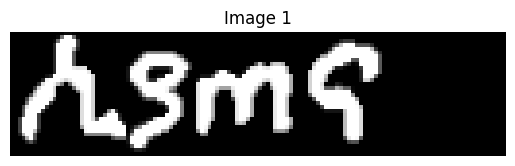

In [26]:
for i in range(images.shape[0]):
    plt.imshow(images[10], cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()  # This will display one image at a time
    break

6375

In [27]:
import random

amharic_chars = [chr(cp) for cp in range(0x1200, 0x1380)]  # U+1200 to U+137F

# Randomly select 300 characters
sampled_chars = random.choices(amharic_chars, k=300)

# Join them into a string
amharic_string = ''.join(sampled_chars)

print(amharic_string)

፳ጝቷኸኴ፫቗ጌዢፓዢጡሂቛዊፎሢዿፀሐጝሻዝሺኲትኅጷጇ፮቙፬ፓዡዳኑጓ።ሟሔጞተ፾ገጺኮኣኤጛቢለዜሀደፗዞየጁጞዕሟዬ቎ዶጯኈተሽኜኟሰቻዎኦየኯ፷ኌጏ጖ጲዞሙዤሙኒ፸ዅኣከኼቡ፜ሐ኷፸ኣዎራቬጳሂሌዼብሗጹፙመዕፇሎ፟ሊቷ፶ጁኍጬሇ፲ኼደፗኖቈዘጿሃሹ኏ዄጨወ዗ኡፕኙ፶ቘጁዯሣጛቩሬኽባሞፒጣሂሙሞቈዾሖቼዽሮጂኂቝቹኖሟኪጪፓቹኊቕዹጂፃሼፌደቸኈቕፄ፜ኞረ፱ቛማፑ኏ኁጢኑሚዾገጸ቉ህጴጆቃ፣ኂቒዂቫቴ቏ዿሏቺቚፈቻኖኈጾሎዂዘ኶ሠቿ኱፜ጮዒግቅ፸ኲዜ዇ጤሪ኉ጼርጙቲቂኩሤዔሓኸፚኗ፷ቑጠኧዛ፞ው፮ቿ቞ኾዾፘዞኍድቩፀ኷቞ፉቾዄኇቯሲኜቧ፥ጴዷቱኾውጌቊላዝኾኾቖ዁ታኤሇኵዜቪአቧፃ


In [51]:
hdrand_root = "../raw_data/old/hhd/test/test_rand/image_rand"

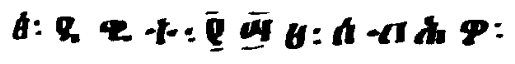

ፅ፡ዳዊት፡፻፵፱፡ሰብሕዎ፡                                


In [53]:
display_image(os.path.join(hdrand_root , hhd_df.iloc[0]['images']))  
print(hhd_df.iloc[0]['text'])

In [54]:
texts = hhd_df['text'].tolist()

In [55]:
from collections import Counter
all_text = ''.join(texts)
char_counts = Counter(all_text)



In [56]:
sorted_counts = dict(sorted(char_counts.items(), key=lambda item: item[1], reverse=True))



In [63]:

texts = hhd_df['text'].dropna().astype(str)
char_df = pd.DataFrame(char_counts.items(), columns=["char", "count"])

# Compute 95th percentile threshold
threshold = np.percentile(char_df['count'], 55)

# Define rare characters: strictly below 95th percentile
rare_chars = set(char_df[char_df['count'] < threshold]['char'])

# Tag rows that contain rare characters
def contains_rare_char(text):
    return any(char in rare_chars for char in text)

hhd_df['has_rare'] = texts.apply(contains_rare_char)

# Calculate percentage
percentage = (hhd_df['has_rare'].sum() / len(hhd_df)) * 100
print(f"Percentage of entries with rare characters: {percentage:.2f}%")


Percentage of entries with rare characters: 37.73%


In [64]:

#seperate df with rare and non rare characters
hddrand_df_rare = hhd_df[hhd_df['has_rare'] == True]
hddrand_df_non_rare = hhd_df[hhd_df['has_rare'] == False]

In [65]:
len(hddrand_df_rare), len(hddrand_df_non_rare) 

(2405, 3970)

In [66]:
hhd_df['type'] = 'hdd_rand'

In [67]:
hddrand_df_rare.head(5)

,images,text,has_rare
0,test_rand_00000.png,ፅ፡ዳዊት፡፻፵፱፡ሰብሕዎ፡,True
1,test_rand_00001.png,ኦሰ፡ኤጲሰ፡ቆጶስ፡፲፬እስተ,True
2,test_rand_00002.png,የምንሰራው፡ብዙ፡በጎ፡ነገር,True
7,test_rand_00007.png,ዓኪኀበ፡ቁሰጠገጢ,True
9,test_rand_00009.png,ሜን።ወበአሐቲ፡,True


In [68]:
test_df = pd.DataFrame(columns=['image_filename', 'line_text', 'type'])

In [69]:
len(hddrand_df_rare)

2405

In [70]:
import os
import shutil
from PIL import Image
count = 0
possible_duplicates = []
for i in range(len(hddrand_df_rare)):
    source_file = (os.path.join(hdrand_root , hddrand_df_rare.iloc[i]['images']))  
    destination_file = os.path.join("../raw_data/Amharic_Data/test", ("hdd_rand_" + hddrand_df_rare.iloc[i]['images']))

    if os.path.isfile(source_file):
        shutil.copy2(source_file, destination_file)
   
    test_df = test_df.append({'image_filename': ("hdd_rand_" + hddrand_df_rare.iloc[i]['images']), 'line_text': hddrand_df_rare.iloc[i]['text'], 'type': 'hdd_rand'}, ignore_index=True)
   

/tmp/ipykernel_1423876/4135749534.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'image_filename': ("hdd_rand_" + hddrand_df_rare.iloc[i]['images']), 'line_text': hddrand_df_rare.iloc[i]['text'], 'type': 'hdd_rand'}, ignore_index=True)
/tmp/ipykernel_1423876/4135749534.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'image_filename': ("hdd_rand_" + hddrand_df_rare.iloc[i]['images']), 'line_text': hddrand_df_rare.iloc[i]['text'], 'type': 'hdd_rand'}, ignore_index=True)
/tmp/ipykernel_1423876/4135749534.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'image_filename': ("hdd_rand_" + hddrand_df_rare.iloc[i]['images']), 'line_text': hd

In [71]:
test_df.to_csv("../raw_data/Amharic_Data/test/hdd_rand_test.csv", index=False)

In [72]:
test_df.head()


,image_filename,line_text,type
0,hdd_rand_test_rand_00000.png,ፅ፡ዳዊት፡፻፵፱፡ሰብሕዎ፡,hdd_rand
1,hdd_rand_test_rand_00001.png,ኦሰ፡ኤጲሰ፡ቆጶስ፡፲፬እስተ,hdd_rand
2,hdd_rand_test_rand_00002.png,የምንሰራው፡ብዙ፡በጎ፡ነገር,hdd_rand
3,hdd_rand_test_rand_00007.png,ዓኪኀበ፡ቁሰጠገጢ,hdd_rand
4,hdd_rand_test_rand_00009.png,ሜን።ወበአሐቲ፡,hdd_rand


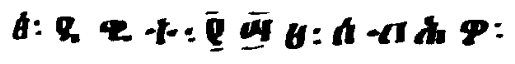

ፅ፡ዳዊት፡፻፵፱፡ሰብሕዎ፡                                


In [73]:
display_image(os.path.join("../raw_data/Amharic_Data/test", test_df.iloc[0]['image_filename']))
print(test_df.iloc[0]['line_text'])